## Matplotlib
### References: 
1. http://swcarpentry.github.io/python-novice-gapminder/09-plotting/index.html 

2. Ch. 9 in Wes McKinney's <a href="https://www.oreilly.com/library/view/python-for-data/9781491957653/">Python for Data Analysis, 2nd Edition</a>

## `matplotlib` is the most widely used scientific plotting library in Python.

- We commonly use one of its sub-libraries, `matplotlib.pyplot`
- We typically import this sub-library and reference it as `plt`:

In [1]:
import matplotlib.pyplot as plt

- The Jupyter Notebook will render plots *inline* (i.e., in the same cell where we make the plot) using a "magic" command:

In [2]:
%matplotlib inline

- Simple plots are then (fairly) simple to create.
- Let's first create a simple position (y-axis) vs. time (x-axis) plot.

In [3]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

## Plot a simple line graph. The first line below creates a figure and plots `position` versus `time`. The next two lines label the x- and y-axes.

Text(0, 0.5, 'Position (km)')

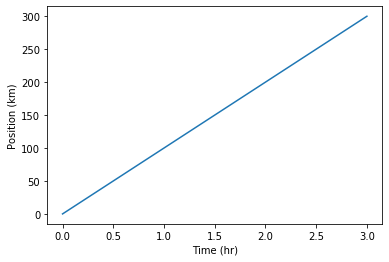

In [4]:
plt.plot (time, position)
plt.xlabel ('Time (hr)')
plt.ylabel ('Position (km)')

### We can also just pass in a single array of data. `matplotlib` will automatically assign an x-axis to go along with it.

Number of elements in the array = 11


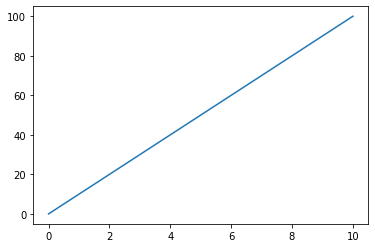

In [5]:
data = range(0,110,10) # Create an array that starts at 0 and ends at 100, with an increment of 10 ... thus 11 elements
print ("Number of elements in the array = %d" % len(data) )
plt.plot(data) # X-axis starts at 0 and ends at 10

### Now, create a more general figure in `matplotlib`. A *figure* consists of a `figure` and one or more `axes`. The terminology takes a bit of getting used to as `axes` are not the same thing as an x- and y-axis. Instead, think of `axes` as one distinct *graph* on a *canvas* represented by `figure`.

### First, define one `figure` object and one `axes` object. We define them by calling the appropriate methods in `matplotlib.pyplot`.
#### Define our single `axes` object by using the `add_subplot` method which essentially creates a `subplot` which is a 1x1 array of individual `axes` ... i.e. just one `axes` per figure.

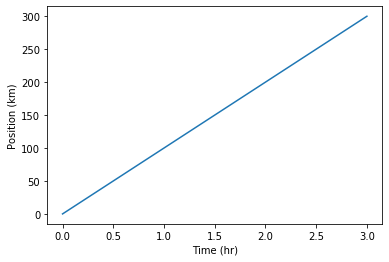

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlabel ('Time (hr)')
plt.ylabel ('Position (km)')
ax.plot (time, position)

### Instead of creating a default `figure` object, customize it. One of the most typical ways to customize it is to define its size. We pass in a `tuple` (basically, an immutable, or unchangeable, `list`) with the figure's horizontal and vertical dimensions, in inches.

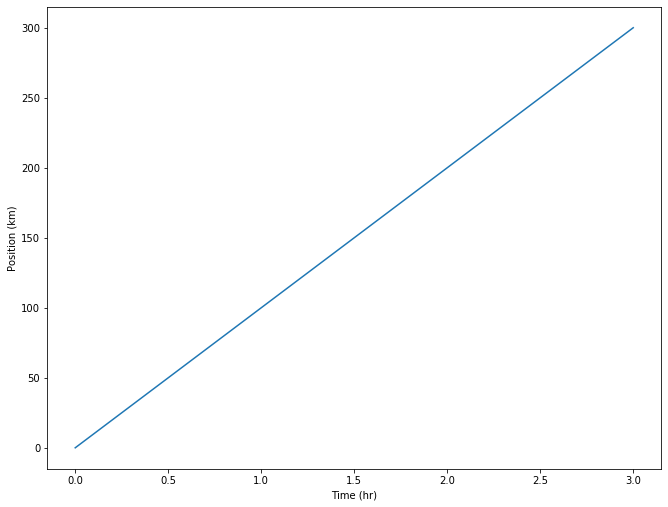

In [7]:
fig = plt.figure(figsize=(11,8.5)) # would fill a standard letter-size sheet of paper
ax = fig.add_subplot(1,1,1)
plt.xlabel ('Time (hr)')
plt.ylabel ('Position (km)')
ax.plot (time, position)

### Next, create a figure with two `axes`. 

### Following https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot,

### `add_subplot` can take "either a 3-digit integer or three separate integers describing the position of the subplot. If the three integers are nrows, ncols, and index in order, the subplot will take the index position on a grid with nrows rows and ncols columns. index starts at 1 in the upper left corner and increases to the right."
### Thus, `subplot 2,2,1` would create a 2x2 matrix of axes and fix the current axes to the top-left one.

In [8]:
position2 = [1,8,64,256]

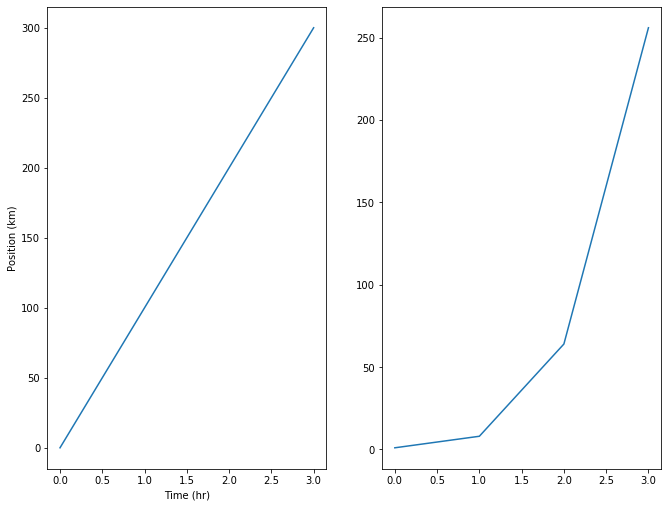

In [9]:
fig = plt.figure(figsize=(11,8.5))
ax1 = fig.add_subplot(1,2,1) # Left-hand side axes
plt.xlabel ('Time (hr)')
plt.ylabel ('Position (km)')

ax2 = fig.add_subplot(1,2,2) # Right-hand side axes

ax1.plot (time, position)
ax2.plot (time,position2)


### Notice that we only get axis labels on the left-most `axes`. If we move the `plt.xlabel` and `plt.ylabel` lines after the second `axes` is defined, we get the reverse problem

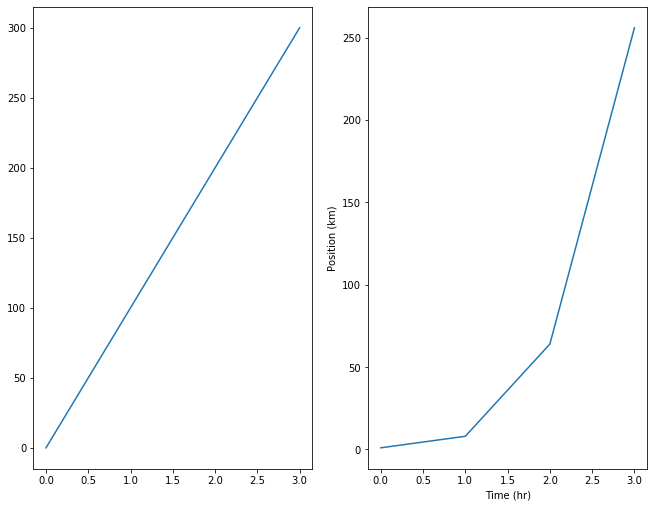

In [10]:
fig = plt.figure(figsize=(11,8.5))
ax1 = fig.add_subplot(1,2,1) # Left-hand side axes
ax2 = fig.add_subplot(1,2,2) # Right-hand side axes
plt.xlabel ('Time (hr)')
plt.ylabel ('Position (km)')

ax1.plot (time, position)
ax2.plot (time,position2)


### A better way is to label attributes on the `axes` themselves rather than using the generic `matplotlib.pyplot.plt` method. Here, we use the `axes.set_xlimit` and `axes.set_ylimit` methods.

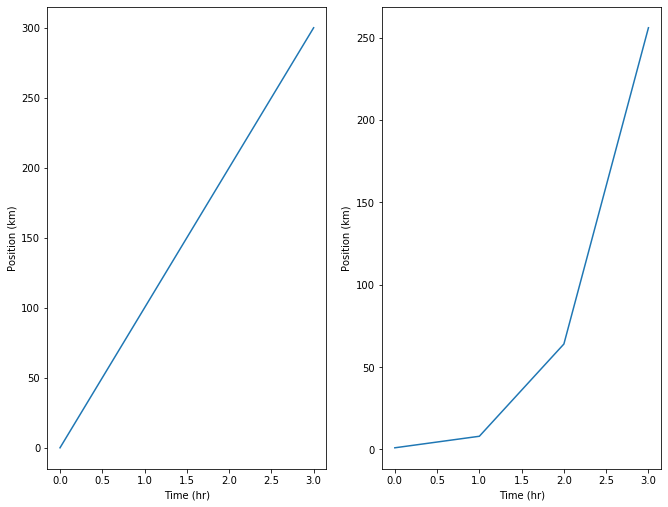

In [11]:
fig = plt.figure(figsize=(11,8.5))
ax1 = fig.add_subplot(1,2,1) # Left-hand side axes

ax1.set_xlabel ('Time (hr)')
ax1.set_ylabel ('Position (km)')

ax1.plot (time, position)

ax2 = fig.add_subplot(1,2,2) # Right-hand side axes

ax2.set_xlabel ('Time (hr)')
ax2.set_ylabel ('Position (km)')

ax2.plot (time,position2)


### Note that the y-axes don't match up. Re-do the cell above but add in the `sharex` and `sharey` options to `add_subplot` .

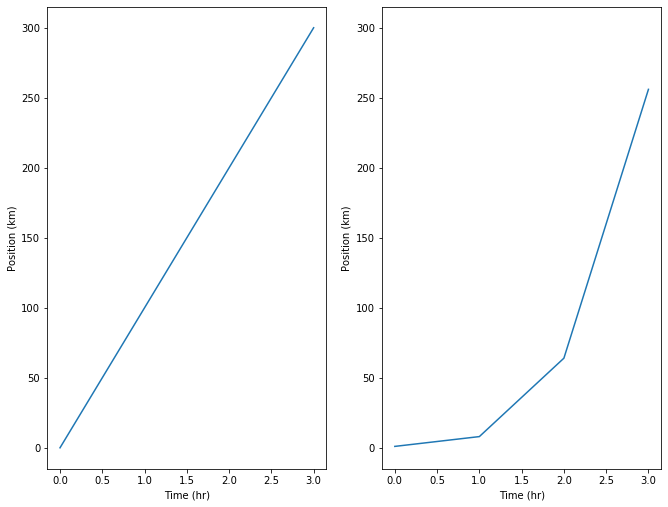

In [12]:
fig = plt.figure(figsize=(11,8.5))
ax1 = fig.add_subplot(1,2,1) # Left-hand side axes

ax1.set_xlabel ('Time (hr)')
ax1.set_ylabel ('Position (km)')

ax1.plot (time, position)

ax2 = fig.add_subplot(1,2,2,sharex=ax1, sharey=ax1) # Right-hand side axes

ax2.set_xlabel ('Time (hr)')
ax2.set_ylabel ('Position (km)')

ax2.plot (time,position2)


## Now, let's load in some "real" data. As we did in our Pandas notebook last time, let's load in some climate data files for a few cities ... this time, just for a full month's of data (February 2020).

In [13]:
import pandas as pd

In [14]:
# Create dataframe objects that point to the following csv files.
alb_csv = '/spare11/atm350/common/200303/alb_feb2020.csv'
btv_csv = '/spare11/atm350/common/200303/btv_feb2020.csv'
mia_csv = '/spare11/atm350/common/200303/mia_feb2020.csv'
sfo_csv = '/spare11/atm350/common/200303/sfo_feb2020.csv'
df_alb = pd.read_csv(alb_csv, delim_whitespace=True, dtype='str')
df_btv = pd.read_csv(btv_csv, delim_whitespace=True, dtype='str')
df_mia = pd.read_csv(mia_csv, delim_whitespace=True, dtype='str')
df_sfo = pd.read_csv(sfo_csv, delim_whitespace=True, dtype='str')

### Read in maximum temperatures for the four cities and assign them as `DataSeries` objects. Convert them from `string` to `float16` values.

In [15]:
alb_MaxT = df_alb['MAX'].astype("float16")
btv_MaxT = df_btv['MAX'].astype("float16")
mia_MaxT = df_mia['MAX'].astype("float16")
sfo_MaxT = df_sfo['MAX'].astype("float16")

## Exercise: create `DataSeries` objects for *minimum* temperature.

In [16]:
#alb_MinT = 
#btv_MinT =
#mia_MinT =
#sfo_MinT =
alb_MinT = df_alb['MIN'].astype("float16")
btv_MinT = df_btv['MIN'].astype("float16")
mia_MinT = df_mia['MIN'].astype("float16")
sfo_MinT = df_sfo['MIN'].astype("float16")

### Are you noticing that our code is a bit inefficient ... in that we are just repeating similar lines of code again and again? We'll deal with that in an upcoming class when we explain the utility of `functions` in Python!

## Now, let's make a single-`axes` plot of Albany's max temperature data.

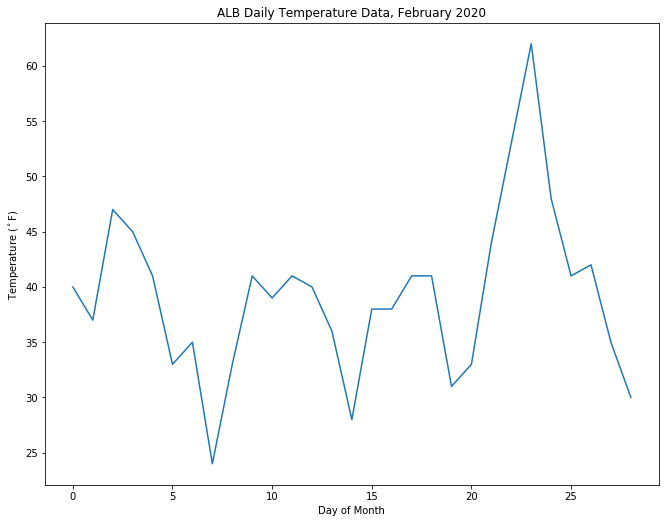

In [17]:
fig = plt.figure(figsize=(11,8.5))
ax = fig.add_subplot(1,1,1) # Left-hand side axes
ax.set_xlabel ('Day of Month')
ax.set_ylabel ('Temperature ($^\circ$F)')
ax.set_title ("ALB Daily Temperature Data, February 2020")
ax.plot (alb_MaxT)

## Note that the x-axis begins at 0 and ends at 28! We need to include an x-axis in our `plot` statement after all.
### Since our data file is just for a single month, and its first column is just in `DD` format (just days of the month), we can just read in that column as its own series, and not have to worry about converting it into a `datetime` format as we did with our yearly file in the Pandas notebook ... at least for the purposes of this notebook

In [18]:
days = df_alb['DY'].astype("int8") # Still need to recast from string to number ... in this case an 8-bit integer is fine.

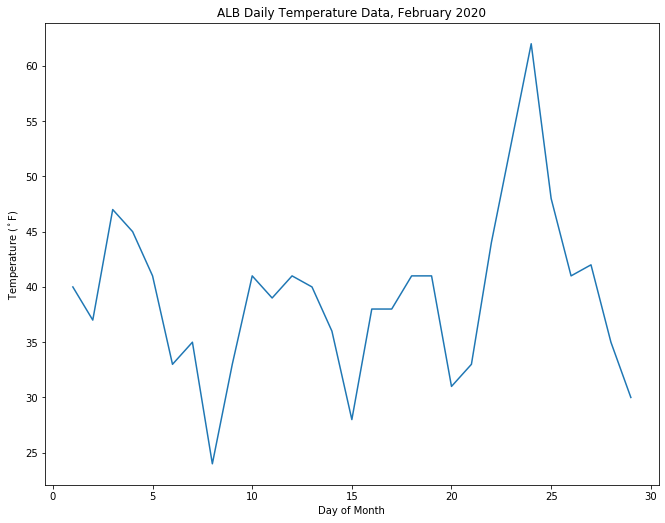

In [19]:
fig = plt.figure(figsize=(11,8.5))
ax = fig.add_subplot(1,1,1) # Left-hand side axes
ax.set_xlabel ('Day of Month')
ax.set_ylabel ('Temperature ($^\circ$F)')
ax.set_title ("ALB Daily Temperature Data, February 2020")
ax.plot (days, alb_MaxT) # Pass in our days series as the array corresponding to the x-axis

### We'll illustrate several ways of customizing the look of our time series trace. 
#### For more info, see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html (scroll down to "Notes: Format Strings" to see the full list of markers, line styles, and colors!)

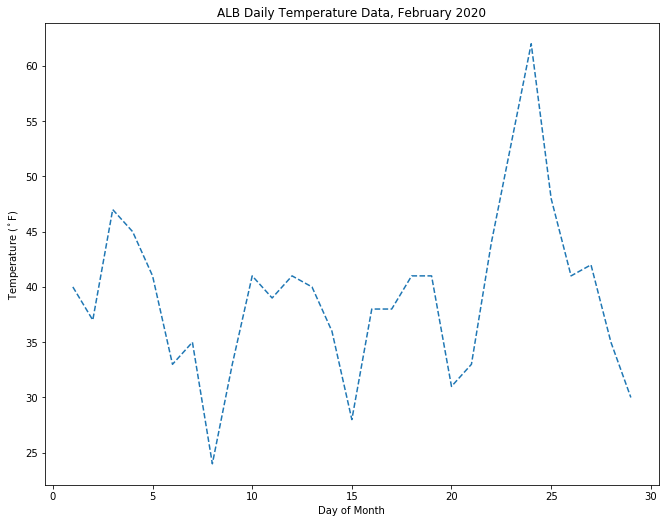

In [20]:
fig = plt.figure(figsize=(11,8.5))
ax = fig.add_subplot(1,1,1) # Left-hand side axes
ax.set_xlabel ('Day of Month')
ax.set_ylabel ('Temperature ($^\circ$F)')
ax.set_title ("ALB Daily Temperature Data, February 2020")
ax.plot (days, alb_MaxT,'--') #dashes

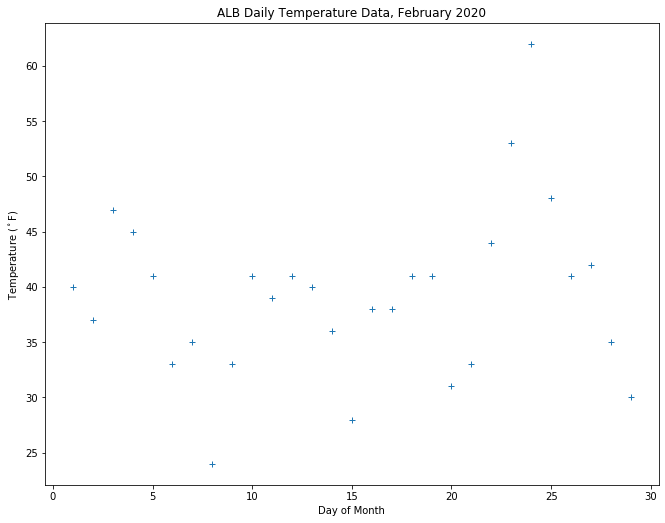

In [21]:
fig = plt.figure(figsize=(11,8.5))
ax = fig.add_subplot(1,1,1) # Left-hand side axes
ax.set_xlabel ('Day of Month')
ax.set_ylabel ('Temperature ($^\circ$F)')
ax.set_title ("ALB Daily Temperature Data, February 2020")
ax.plot (days, alb_MaxT,'+') # plus symbols

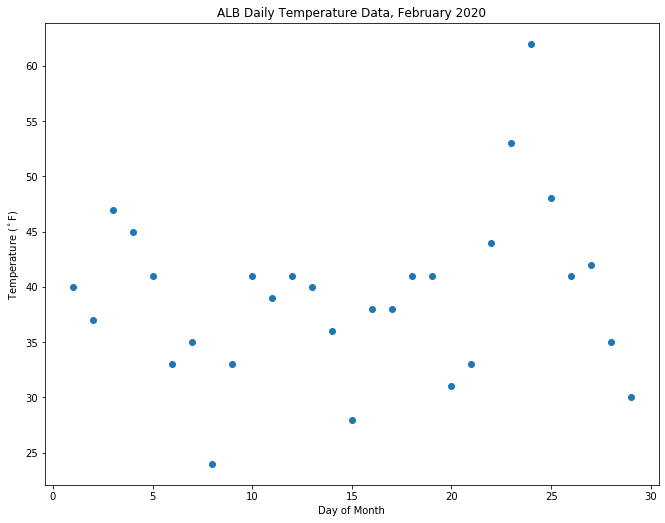

In [22]:
fig = plt.figure(figsize=(11,8.5))
ax = fig.add_subplot(1,1,1) # Left-hand side axes
ax.set_xlabel ('Day of Month')
ax.set_ylabel ('Temperature ($^\circ$F)')
ax.set_title ("ALB Daily Temperature Data, February 2020")
ax.plot (days, alb_MaxT,'o') # dots

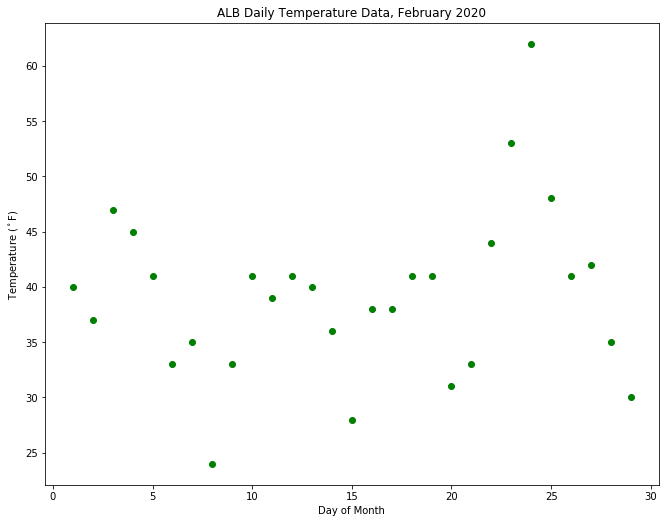

In [23]:
fig = plt.figure(figsize=(11,8.5))
ax = fig.add_subplot(1,1,1) # Left-hand side axes
ax.set_xlabel ('Day of Month')
ax.set_ylabel ('Temperature ($^\circ$F)')
ax.set_title ("ALB Daily Temperature Data, February 2020")
ax.plot (days, alb_MaxT,'go') # green-colored dots

### As we did in the Pandas notebook, let's pretty things up with the use of the `seaborn` package, and let's plot max temp in red.

In [24]:
import seaborn
seaborn.set()

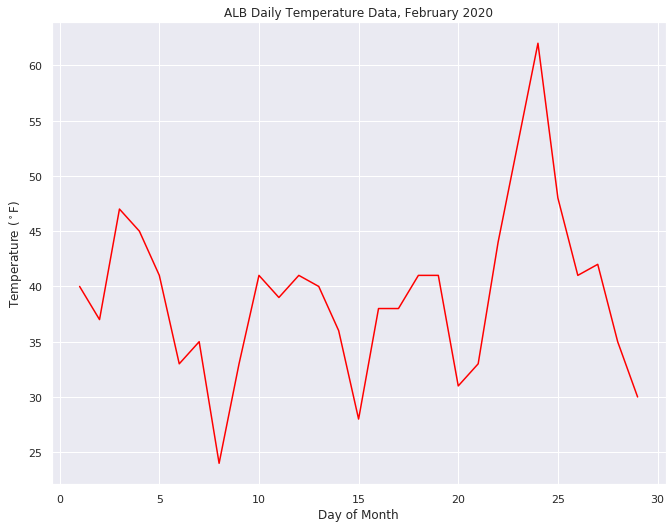

In [25]:
fig = plt.figure(figsize=(11,8.5))
ax = fig.add_subplot(1,1,1) # Left-hand side axes
ax.set_xlabel ('Day of Month')
ax.set_ylabel ('Temperature ($^\circ$F)')
ax.set_title ("ALB Daily Temperature Data, February 2020")
ax.plot (days, alb_MaxT,color='red')

## Exercise: as we did in the Pandas notebook, now include minimum temperature in blue, and add an informative legend.
### Hint: you will need to add a `label` argument to the `plot` method. Refer to the Pandas notebook!

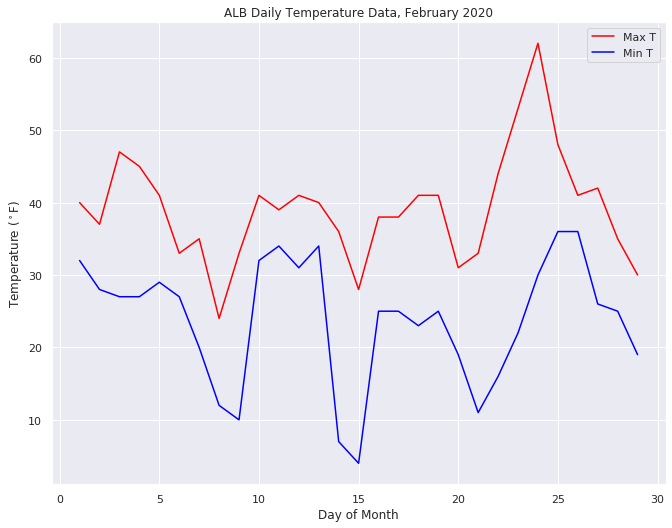

In [26]:
fig = plt.figure(figsize=(11,8.5))
ax = fig.add_subplot(1,1,1) # Left-hand side axes
ax.set_xlabel ('Day of Month')
ax.set_ylabel ('Temperature ($^\circ$F)')
ax.set_title ("ALB Daily Temperature Data, February 2020")
ax.plot (days,alb_MaxT,color='red',label = "Max T")
ax.plot (days,alb_MinT,color='blue', label = "Min T")
ax.legend(loc="best")
##ax.plot(*** complete this cell***)
## *** add the correct line to add a legend to the figure***

## Next step: make a `Figure` with four `axes`, oriented 2x2. One city's data per `axes`. Just plot maximum temperature for now.
### Note that we can pass in `days` as our x-array for all four sites, since that array is the same for all.

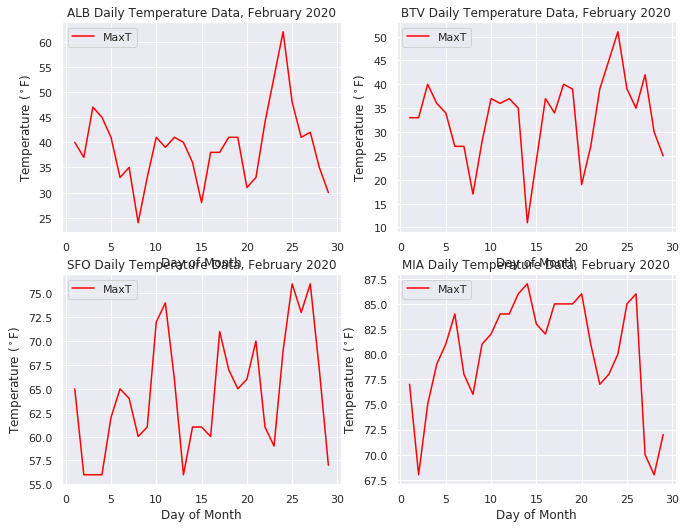

In [27]:
fig = plt.figure(figsize=(11,8.5))
ax = fig.add_subplot(2,2,1) 
ax.set_xlabel ('Day of Month')
ax.set_ylabel ('Temperature ($^\circ$F)')
ax.set_title ("ALB Daily Temperature Data, February 2020")
ax.plot (days, alb_MaxT,color='red', label='MaxT')
ax.legend(loc="best")

ax2 = fig.add_subplot(2,2,2) 
ax2.set_xlabel ('Day of Month')
ax2.set_ylabel ('Temperature ($^\circ$F)')
ax2.set_title ("BTV Daily Temperature Data, February 2020")
ax2.plot (days, btv_MaxT,color='red', label='MaxT')
ax2.legend(loc="best")

ax3 = fig.add_subplot(2,2,3) 
ax3.set_xlabel ('Day of Month')
ax3.set_ylabel ('Temperature ($^\circ$F)')
ax3.set_title ("SFO Daily Temperature Data, February 2020")
ax3.plot (days, sfo_MaxT,color='red', label='MaxT')
ax3.legend(loc="best")

ax4 = fig.add_subplot(2,2,4) 
ax4.set_xlabel ('Day of Month')
ax4.set_ylabel ('Temperature ($^\circ$F)')
ax4.set_title ("MIA Daily Temperature Data, February 2020")
ax4.plot (days, mia_MaxT,color='red', label='MaxT')
ax4.legend(loc="best")

## Exercise: Can you name a couple things about this figure that are less than ideal? How might you fix them?

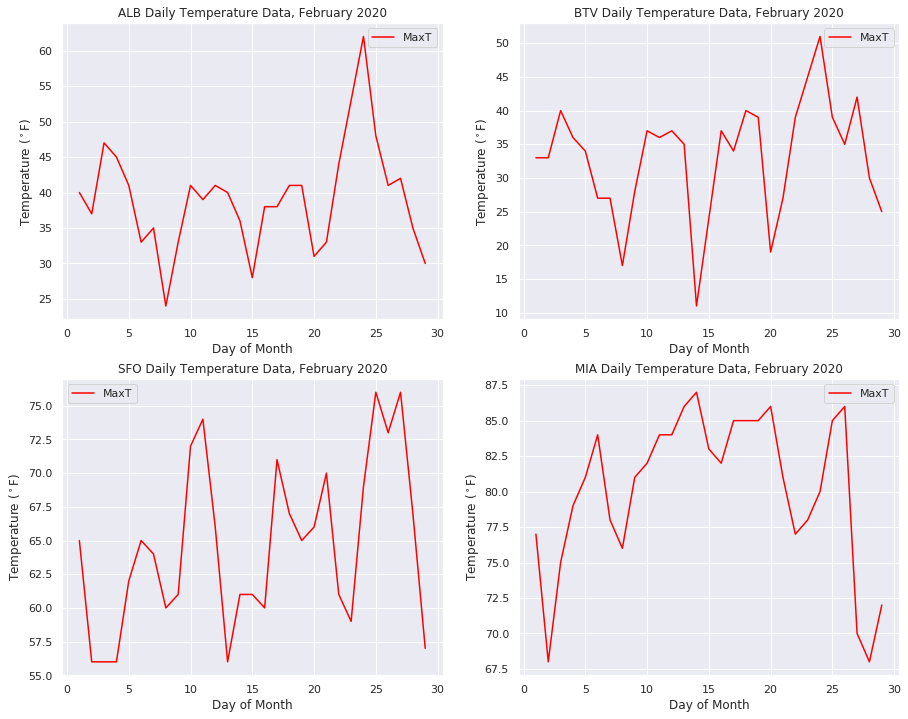

In [28]:
# First fix: make the figure bigger.

fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(2,2,1) 
ax.set_xlabel ('Day of Month')
ax.set_ylabel ('Temperature ($^\circ$F)')
ax.set_title ("ALB Daily Temperature Data, February 2020")
ax.plot (days, alb_MaxT,color='red', label='MaxT')
ax.legend(loc="best")

ax2 = fig.add_subplot(2,2,2) 
ax2.set_xlabel ('Day of Month')
ax2.set_ylabel ('Temperature ($^\circ$F)')
ax2.set_title ("BTV Daily Temperature Data, February 2020")
ax2.plot (days, btv_MaxT,color='red', label='MaxT')
ax2.legend(loc="best")

ax3 = fig.add_subplot(2,2,3) 
ax3.set_xlabel ('Day of Month')
ax3.set_ylabel ('Temperature ($^\circ$F)')
ax3.set_title ("SFO Daily Temperature Data, February 2020")
ax3.plot (days, sfo_MaxT,color='red', label='MaxT')
ax3.legend(loc="best")

ax4 = fig.add_subplot(2,2,4) 
ax4.set_xlabel ('Day of Month')
ax4.set_ylabel ('Temperature ($^\circ$F)')
ax4.set_title ("MIA Daily Temperature Data, February 2020")
ax4.plot (days, mia_MaxT,color='red', label='MaxT')
ax4.legend(loc="best")

## A good strategy might be to share the y-axis between all four plots. But that may be problematic here, as the range of the data is quite a bit different between the four cities. Instead, let's manually set the range of the y-axis for the first `axes` and then share it with our other three `axes`.

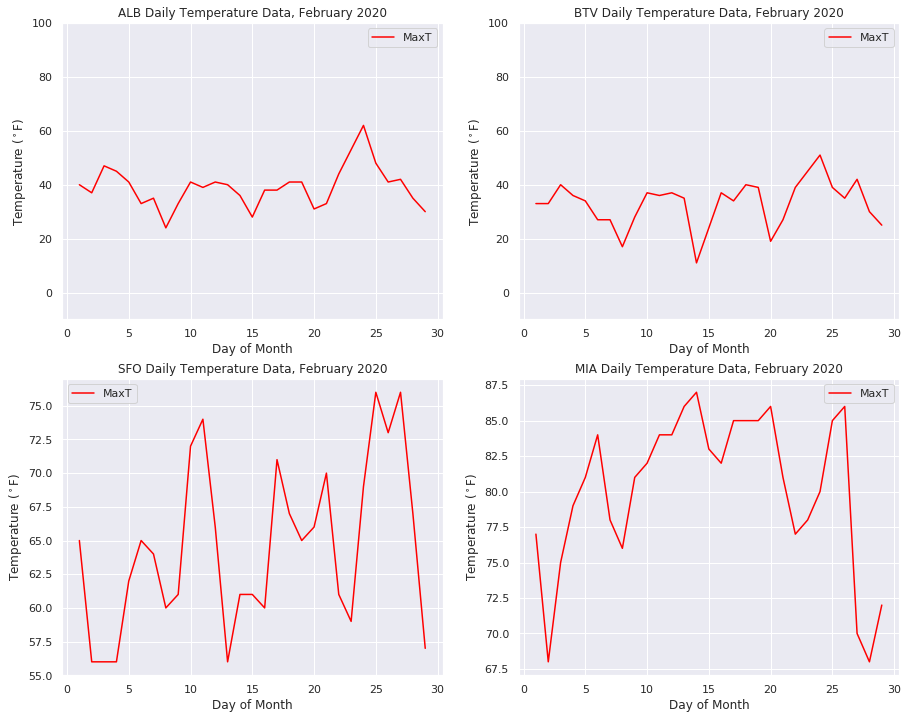

In [29]:
# Next fix: specify a y-axis range.
# Share the y-axis among all four axes. One of them is done for you. Do so for the other two!

fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(2,2,1) 
ax.set_ylim(ymin=-10,ymax=100)
ax.set_xlabel ('Day of Month')
ax.set_ylabel ('Temperature ($^\circ$F)')
ax.set_title ("ALB Daily Temperature Data, February 2020")
ax.plot (days, alb_MaxT,color='red', label='MaxT')
ax.legend(loc="best")

ax2 = fig.add_subplot(2,2,2,sharex=ax, sharey=ax) 
ax2.set_xlabel ('Day of Month')
ax2.set_ylabel ('Temperature ($^\circ$F)')
ax2.set_title ("BTV Daily Temperature Data, February 2020")
ax2.plot (days, btv_MaxT,color='red', label='MaxT')
ax2.legend(loc="best")

ax3 = fig.add_subplot(2,2,3) 
ax3.set_xlabel ('Day of Month')
ax3.set_ylabel ('Temperature ($^\circ$F)')
ax3.set_title ("SFO Daily Temperature Data, February 2020")
ax3.plot (days, sfo_MaxT,color='red', label='MaxT')
ax3.legend(loc="best")

ax4 = fig.add_subplot(2,2,4) 
ax4.set_xlabel ('Day of Month')
ax4.set_ylabel ('Temperature ($^\circ$F)')
ax4.set_title ("MIA Daily Temperature Data, February 2020")
ax4.plot (days, mia_MaxT,color='red', label='MaxT')
ax4.legend(loc="best")